## Easy
Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

## Normal
Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

## Hard
Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

## Easy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/train.csv', index_col=0)

In [4]:
df
#df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
#Общее количество пассажиров
total_pass = df.shape[0]

#Количество детей
children = df[df['Age'] < 18].shape[0]
percent = children / total_pass * 100

print("Процент детей младше 18 лет:", round(percent,2),"%")

Процент детей младше 18 лет: 12.68 %


In [6]:
#Количество мужчин
male_count = df[df['Sex'] == "male"].shape[0]

#Количество женщин
female_count = df[df['Sex'] == "female"].shape[0]

#Соотношение мужчин и женщин
count_male = round(male_count / total_pass * 100, 2)
count_female = round(female_count / total_pass * 100, 2)
print(f"Процент мужчин {count_male}, процент женщин {count_female}")

Процент мужчин 64.76, процент женщин 35.24


## Normal

In [31]:
#Общий подсчет Nan
print(df.isnull().sum(axis=0))

#Нет информации по полу
print("Нет информации по полу", sum(pd.isnull(df["Sex"])))

#Нет информации по возрасту
print("Нет информации по возрасту", sum(pd.isnull(df["Age"])))

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Нет информации по полу 0
Нет информации по возрасту 177


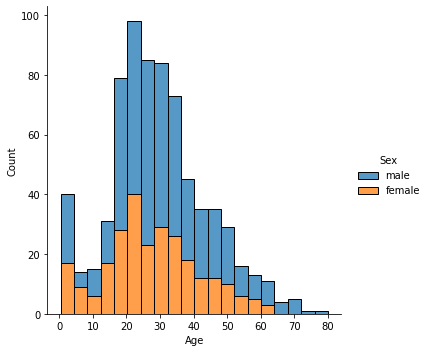

In [68]:
# Гистограмма по возрасту пассажиров
sns.displot(data=df, x='Age', hue='Sex', multiple='stack')


In [52]:
#Какой процент мужин и женщин выжили, какой процент детей выжили
male_survived = df[(df['Sex'] == "male") & (df['Survived'] == 1)].shape[0]
print("Выжило",male_survived, "мужчин")

female_survived = df[(df['Sex'] == "female") & (df['Survived'] == 1)].shape[0]
print("Выжило",female_survived, "женщин")

child_survived = df[(df['Age'] < 18) & (df['Survived'] == 1)].shape[0]
print("Выжило",child_survived, "детей")

#Процент выживших
surv_male = male_survived / male_count * 100
surv_female = female_survived / female_count * 100
surv_child = child_survived / children * 100

print("Женщин выжило", round(surv_female,2),"%")
print("Мужчин выжило", round(surv_male,2),"%")
print("Детей выжило", round(surv_child,2),"%")


Выжило 109 мужчин
Выжило 233 женщин
Выжило 61 детей
Женщин выжило 74.2 %
Мужчин выжило 18.89 %
Детей выжило 53.98 %


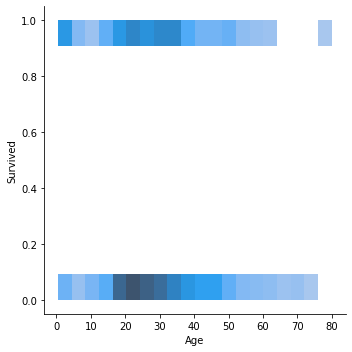

In [64]:
#Корреляция между возрастом и выживаемостью
sns.displot(data=df, x='Age', y='Survived')


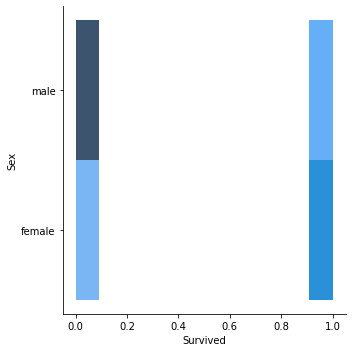

In [61]:
#Корреляция между полом и выживаемостью

#sns.scatterplot(data=df, x="Survived", y="Sex")
sns.displot(data=df, x='Survived', y='Sex')

## Hard

In [70]:
surv_df = df[df["Survived"] == 1]

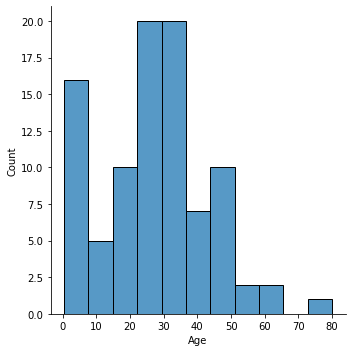

In [74]:
sns.displot(data=surv_df[surv_df["Sex"] == 'male'], x='Age')

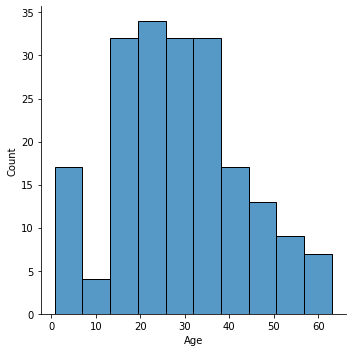

In [76]:
sns.displot(data=surv_df[surv_df["Sex"] == 'female'], x='Age')

##### Гипотеза: 
шанс выжить больше при условии Sex = female и Age>20 но <25
